In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
newdf=(pd.read_csv("/home/nitheesh/Downloads/asteroid.csv")).head(50000)  

#directly short the data in to 50k rows from dataframe

/tmp/ipykernel_3224/68210968.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  newdf=(pd.read_csv("/home/nitheesh/Downloads/asteroid.csv")).head(50000)


In [59]:
len(newdf)

50000

In [60]:
newdf.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [61]:
df=pd.DataFrame(newdf[['neo','pha','H','albedo','epoch','e','i','ma','rms','diameter']])

#collect wanted columns from the 45 rows and set it as a dataframe

In [62]:
df.head()

,neo,pha,H,albedo,epoch,e,i,ma,rms,diameter
0,N,N,3.40,0.0900,2458600.5,0.076009,10.594067,77.372098,0.43301,939.400
1,N,N,4.20,0.1010,2459000.5,0.229972,34.832932,144.975675,0.35936,545.000
2,N,N,5.33,0.2140,2459000.5,0.256936,12.991043,125.435355,0.33848,246.596
3,N,N,3.00,0.4228,2458600.5,0.088721,7.141771,95.861938,0.39980,525.400
4,N,N,6.90,0.2740,2459000.5,0.190913,5.367427,17.846343,0.52191,106.699


In [63]:
df.rename(columns={'neo':'near_earth_object','pha':'potentially_hazardous_astroid',
                   'H':'absolute_magnitude_parameter','e':'eccentricity',
                   'i':'inclination','ma':'median_anomaly','rms':'rms_value_of_signal'},inplace=True)

In [64]:
df.head()

,near_earth_object,potentially_hazardous_astroid,absolute_magnitude_parameter,albedo,epoch,eccentricity,inclination,median_anomaly,rms_value_of_signal,diameter
0,N,N,3.40,0.0900,2458600.5,0.076009,10.594067,77.372098,0.43301,939.400
1,N,N,4.20,0.1010,2459000.5,0.229972,34.832932,144.975675,0.35936,545.000
2,N,N,5.33,0.2140,2459000.5,0.256936,12.991043,125.435355,0.33848,246.596
3,N,N,3.00,0.4228,2458600.5,0.088721,7.141771,95.861938,0.39980,525.400
4,N,N,6.90,0.2740,2459000.5,0.190913,5.367427,17.846343,0.52191,106.699


In [65]:
df.shape

(50000, 10)

In [66]:
df.isna().sum()

near_earth_object                    0
potentially_hazardous_astroid        0
absolute_magnitude_parameter         0
albedo                           15585
epoch                                0
eccentricity                         0
inclination                          0
median_anomaly                       0
rms_value_of_signal                  0
diameter                         15567
dtype: int64

In [67]:
df['albedo']=df['albedo'].fillna(df['albedo'].mode()[0])
df['diameter']=df['diameter'].fillna(df['diameter'].mode()[0])

In [68]:
df.isna().sum()

near_earth_object                0
potentially_hazardous_astroid    0
absolute_magnitude_parameter     0
albedo                           0
epoch                            0
eccentricity                     0
inclination                      0
median_anomaly                   0
rms_value_of_signal              0
diameter                         0
dtype: int64

In [69]:
df.dtypes

near_earth_object                 object
potentially_hazardous_astroid     object
absolute_magnitude_parameter     float64
albedo                           float64
epoch                            float64
eccentricity                     float64
inclination                      float64
median_anomaly                   float64
rms_value_of_signal              float64
diameter                         float64
dtype: object

In [70]:
df.value_counts('near_earth_object')                #Data imbalanced

near_earth_object
N    49725
Y      275
dtype: int64

In [71]:
df.value_counts('potentially_hazardous_astroid')    #Data imbalanced

potentially_hazardous_astroid
N    49936
Y       64
dtype: int64

In [72]:
# since data is imbalaced we remove it

In [73]:
df.drop(columns=['near_earth_object','potentially_hazardous_astroid'],inplace=True)

In [74]:
df.head()

,absolute_magnitude_parameter,albedo,epoch,eccentricity,inclination,median_anomaly,rms_value_of_signal,diameter
0,3.40,0.0900,2458600.5,0.076009,10.594067,77.372098,0.43301,939.400
1,4.20,0.1010,2459000.5,0.229972,34.832932,144.975675,0.35936,545.000
2,5.33,0.2140,2459000.5,0.256936,12.991043,125.435355,0.33848,246.596
3,3.00,0.4228,2458600.5,0.088721,7.141771,95.861938,0.39980,525.400
4,6.90,0.2740,2459000.5,0.190913,5.367427,17.846343,0.52191,106.699


In [75]:
df.dtypes

absolute_magnitude_parameter    float64
albedo                          float64
epoch                           float64
eccentricity                    float64
inclination                     float64
median_anomaly                  float64
rms_value_of_signal             float64
diameter                        float64
dtype: object

In [76]:
df.describe()

,absolute_magnitude_parameter,albedo,epoch,eccentricity,inclination,median_anomaly,rms_value_of_signal,diameter
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,14.077398,0.154845,2.459000e+06,0.137645,7.600177,180.460262,0.510255,7.641672
std,1.325149,0.126841,5.103047e+01,0.070805,5.615854,104.277170,0.047596,14.828975
min,2.400000,0.005000,2.452464e+06,0.001003,0.041350,0.029476,0.162240,0.204000
25%,13.500000,0.057000,2.459000e+06,0.087721,3.380157,89.575788,0.481650,3.472000
50%,14.300000,0.084000,2.459000e+06,0.132090,6.152168,181.301231,0.513980,3.793000
75%,14.900000,0.242000,2.459000e+06,0.178622,10.626867,271.168270,0.542460,7.252250
max,20.700000,1.000000,2.459000e+06,0.900178,160.430921,359.997966,0.814500,939.400000


<AxesSubplot:>

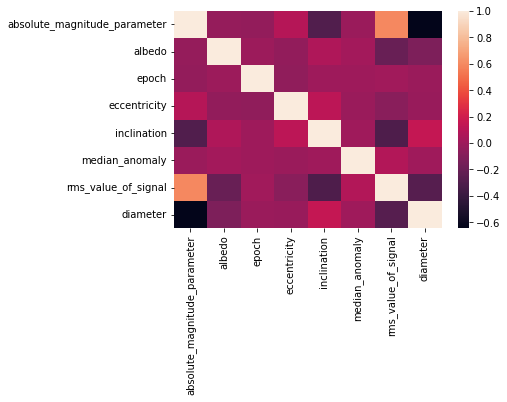

In [77]:
sns.heatmap(df.corr())

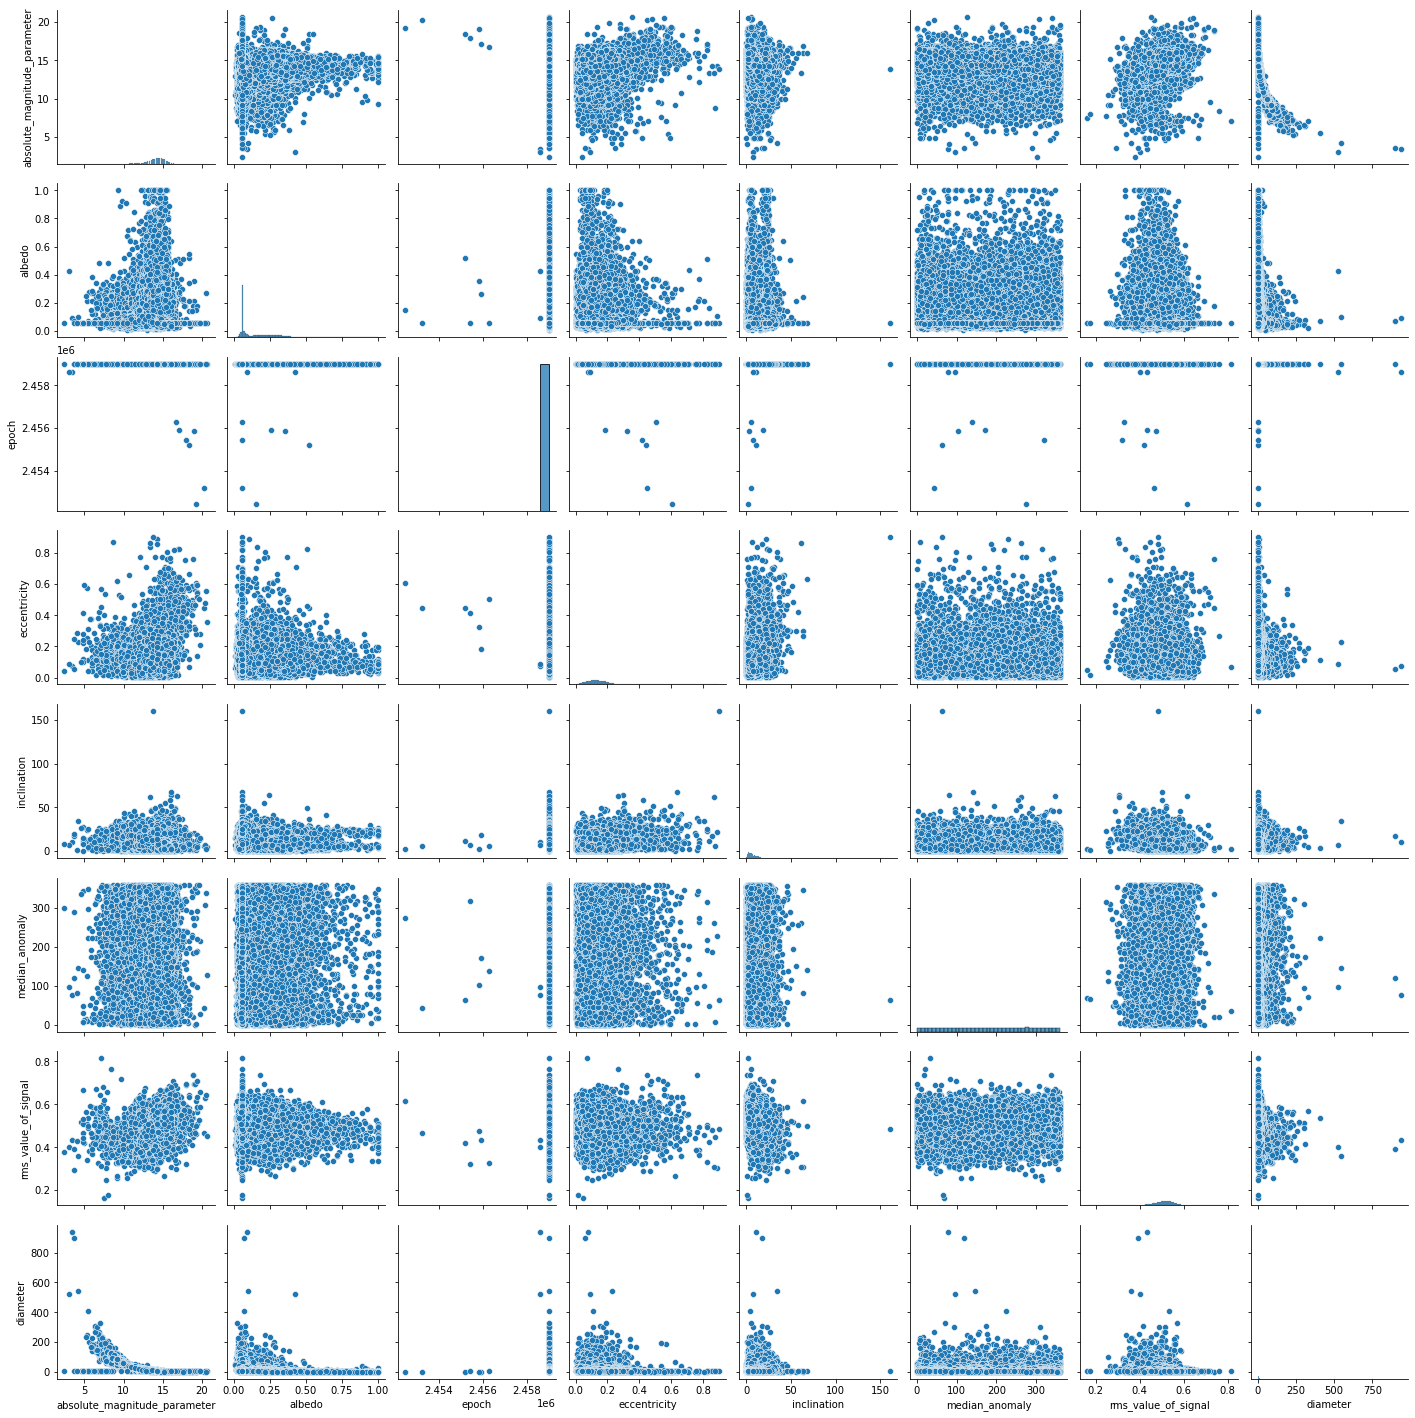

In [78]:
sns.pairplot(df)

<AxesSubplot:xlabel='count', ylabel='diameter'>

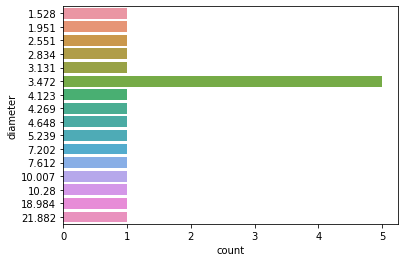

In [79]:
 #select 100 random sample data from 'Diameter' (o/p) to plot and show its distribution
d=df['diameter'].sample(20)
sns.countplot(y=d)

<AxesSubplot:xlabel='count', ylabel='diameter'>

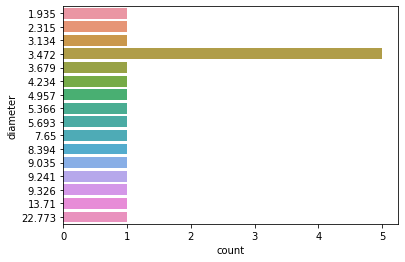

In [80]:
d=df['diameter'].sample(20)
sns.countplot(y=d)

In [81]:
# plot all variables with 'Diameter'

<AxesSubplot:xlabel='diameter', ylabel='absolute_magnitude_parameter'>

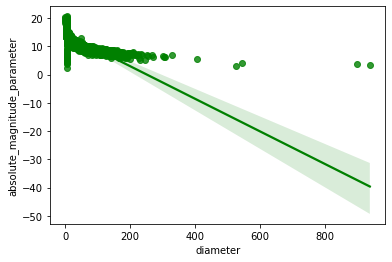

In [82]:
sns.regplot(x=df['diameter'],y=df['absolute_magnitude_parameter'],color='g')

<AxesSubplot:xlabel='diameter', ylabel='albedo'>

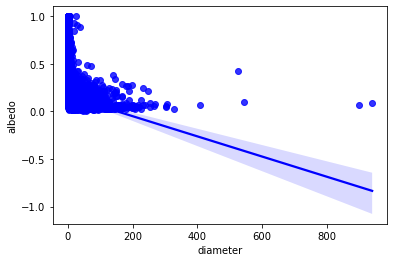

In [83]:
# sns.regplot(x='diameter',y='albedo')
sns.regplot(x=df['diameter'],y=df['albedo'],color='b')

<AxesSubplot:xlabel='diameter', ylabel='epoch'>

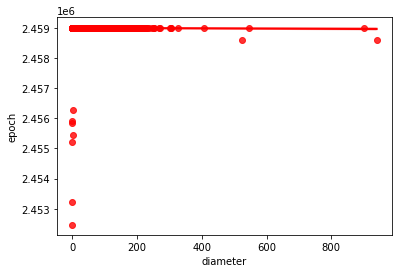

In [84]:
sns.regplot(x=df['diameter'],y=df['epoch'],color='r')

<AxesSubplot:xlabel='diameter', ylabel='eccentricity'>

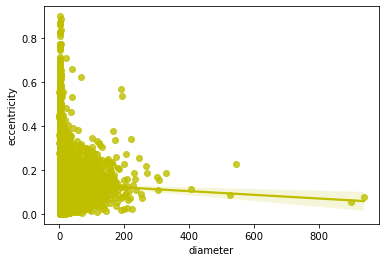

In [85]:
sns.regplot(x=df['diameter'],y=df['eccentricity'],color='y')

<AxesSubplot:xlabel='diameter', ylabel='inclination'>

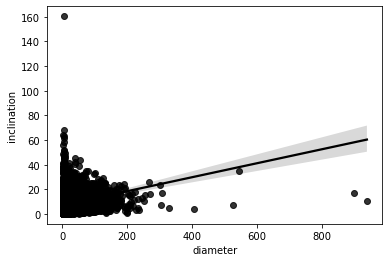

In [86]:
sns.regplot(x=df['diameter'],y=df['inclination'],color='black')

<AxesSubplot:xlabel='diameter', ylabel='median_anomaly'>

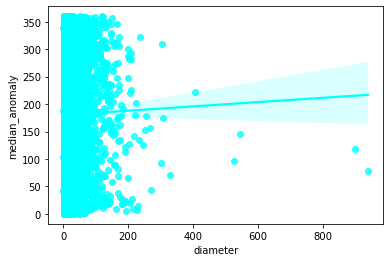

In [87]:
sns.regplot(x=df['diameter'],y=df['median_anomaly'],color='cyan')

<AxesSubplot:xlabel='diameter', ylabel='rms_value_of_signal'>

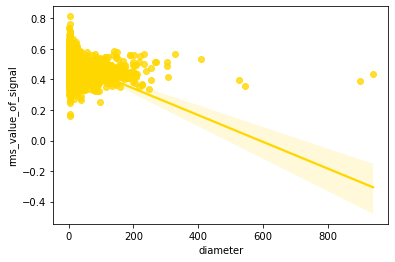

In [88]:
sns.regplot(x=df['diameter'],y=df['rms_value_of_signal'],color='gold')

In [89]:
ip=df.iloc[:,:-1].values
op=df.iloc[:,-1].values

In [90]:
len(op)

50000

In [91]:
op.shape

(50000,)

In [92]:
ip.shape

(50000, 7)

In [93]:
from sklearn.model_selection import train_test_split
iptr,ipts,optr,opts=train_test_split(ip,op,test_size=.10,random_state=30)

In [94]:
iptr #ipts

array([[1.41000000e+01, 2.59000000e-01, 2.45900050e+06, ...,
        9.81651028e+00, 2.41685282e+02, 5.54680000e-01],
       [1.49000000e+01, 5.70000000e-02, 2.45900050e+06, ...,
        1.22854959e+01, 3.27867850e+00, 5.94350000e-01],
       [1.24000000e+01, 7.20000000e-02, 2.45900050e+06, ...,
        2.59869408e+01, 1.40793731e+02, 4.67510000e-01],
       ...,
       [1.58000000e+01, 4.70000000e-02, 2.45900050e+06, ...,
        3.62025330e+00, 8.42880620e+01, 5.64640000e-01],
       [1.37000000e+01, 2.88000000e-01, 2.45900050e+06, ...,
        7.00472721e+00, 1.33768061e+02, 4.91750000e-01],
       [1.54000000e+01, 2.37000000e-01, 2.45900050e+06, ...,
        4.65555340e+00, 1.51528895e+02, 5.24570000e-01]])

In [95]:
optr    #opts

array([ 4.755,  3.472, 18.044, ...,  4.634,  4.302,  2.606])

In [96]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
iptr=ss.fit_transform(iptr)
ipts=ss.fit_transform(ipts)
iptr

array([[ 0.01699951,  0.82179407,  0.01214933, ...,  0.39335888,
         0.58555917,  0.93469262],
       [ 0.620586  , -0.7716027 ,  0.01214933, ...,  0.83230368,
        -1.70151117,  1.7678337 ],
       [-1.26562178, -0.65328116,  0.01214933, ...,  3.26819392,
        -0.38230862, -0.89603358],
       ...,
       [ 1.2996208 , -0.85048373,  0.01214933, ..., -0.7082331 ,
        -0.92437599,  1.14387046],
       [-0.28479373,  1.05054905,  0.01214933, ..., -0.10652963,
        -0.44970693, -0.38695015],
       [ 0.99782755,  0.6482558 ,  0.01214933, ..., -0.52417387,
        -0.27932458,  0.30232866]])

In [97]:
ipts

array([[-0.20925042, -0.76961072,  0.        , ...,  0.16912384,
        -1.12405846,  0.32301244],
       [ 1.07604372,  2.2985226 ,  0.        , ..., -0.68724975,
        -1.42607519,  1.19688166],
       [ 0.84922711, -0.76961072,  0.        , ..., -0.86748107,
        -1.54250735,  0.7330539 ],
       ...,
       [ 0.54680495, -0.76961072,  0.        , ..., -0.34479164,
        -0.5760707 , -0.12119914],
       [-0.73848919, -0.21248165,  0.        , ...,  0.23433282,
        -0.89961082, -1.44307662],
       [ 0.09317173,  1.44321178,  0.        , ..., -0.39969228,
        -0.81116352, -1.45193554]])

# Try Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50)
model.fit(iptr,optr)

RandomForestRegressor(n_estimators=50)

In [99]:
pred=model.predict(ipts)

In [100]:
sample_pred1=model.predict([[5.33,.42,2458600.5,.256936,7.14171,77.378047,.33848]])
print(sample_pred1)

[0.53416]


In [101]:
pred

array([4.32618, 1.83974, 3.472  , ..., 3.472  , 8.72184, 3.65778])

In [102]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
r=(r2_score(opts,pred))
mae=(mean_absolute_percentage_error(opts,pred))
pd.DataFrame({'r2 score':r,'MAE':mae},index=[0])


,r2 score,MAE
0,0.784017,0.12518


Text(0, 0.5, 'Prediction')

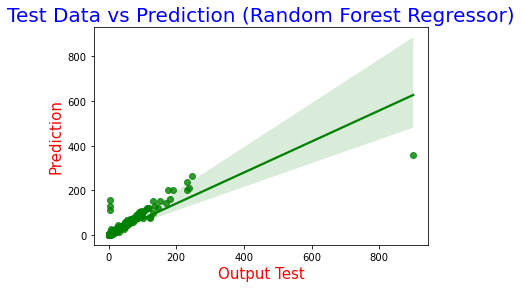

In [103]:
sns.regplot(data=df.corr(),x=opts,y=pred,color='g')
plt.title("Test Data vs Prediction (Random Forest Regressor)",size=20,color='b')
plt.xlabel("Output Test",size=15,color='r')
plt.ylabel("Prediction",size=15,color='r')

In [104]:
rf_comparison=pd.DataFrame({'actual value':opts,'predicted value':pred})

In [105]:
rf_comparison.head(15)

,actual value,predicted value
0,3.472,4.32618
1,1.728,1.83974
2,3.472,3.47200
3,3.617,3.89114
4,3.472,3.47200
5,7.540,8.10692
6,26.970,24.78288
7,3.472,4.50996
8,3.472,3.47200
9,9.333,8.83138


# try Multiple Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(iptr,optr)

LinearRegression()

In [107]:
pred2=model2.predict(ipts)

In [108]:
sample_pred2=model2.predict([[5.33,.42,2458600.5,.256936,7.14171,105.378047,.33848]])
print(sample_pred2)

[-1405517.14161326]


In [109]:
pred2

array([11.00740899, -5.19595834,  0.66916014, ...,  2.77974714,
       13.78779555,  1.39232357])

In [110]:
rr=r2_score(opts,pred)
maee=mean_absolute_percentage_error(opts,pred2)
pd.DataFrame({'r2 score':rr,'MAE':maee},index=[0])

,r2 score,MAE
0,0.784017,0.988231


Text(0, 0.5, 'Prediction')

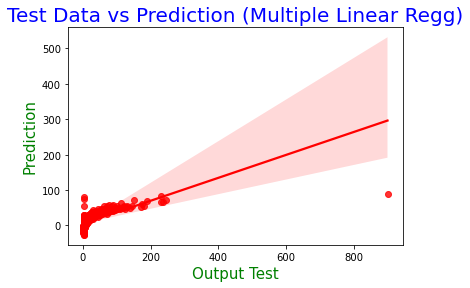

In [111]:
sns.regplot(data=df.corr(),x=opts,y=pred2,color='r')
plt.title("Test Data vs Prediction (Multiple Linear Regg)",size=20,color='b')
plt.xlabel("Output Test",size=15,color='g')
plt.ylabel("Prediction",size=15,color='g')

In [112]:
mlg_comparison=pd.DataFrame({'actual_value':opts,'Prediction':pred2})
mlg_comparison.head(20)

,actual_value,Prediction
0,3.472,11.007409
1,1.728,-5.195958
2,3.472,0.669160
3,3.617,4.843894
4,3.472,-1.539705
5,7.540,10.880666
6,26.970,28.564651
7,3.472,13.576427
8,3.472,1.539507
9,9.333,15.286176
